## Insight project: part 2.1
### Feature Engineering


In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
train_data = pd.read_csv("data/train.csv")

In [2]:
train_data.shape

(708, 4098)

In [3]:
train_data.iloc[:5, 0:5]

,Unnamed: 0,hits,0,1,2
0,Cyclosporin A,1,0.0,0.0,0.0
1,Lidocaine hydrochloride,0,0.0,0.0,0.0
2,Leflunomide,1,0.0,0.0,0.0
3,Debrisoquin sulfate,0,0.0,0.0,0.0
4,3-alpha-Hydroxy-5-beta-androstan-17-one,0,0.0,0.0,0.0


In [4]:
#separate pos vs neg samples 
#only show features
all_sample = train_data.iloc[:, 2:]
pos = train_data[train_data['hits'] > 0].iloc[:, 2:]
neg = train_data[train_data['hits'] == 0].iloc[:, 2:]
print(all_sample.shape, pos.shape, neg.shape)


(708, 4096) (174, 4096) (534, 4096)


In [5]:
#calculate features for each sample
#plot the feature number
all_sample_features = all_sample.sum(axis=1)
print("sparsity: {}".format(1 - np.sum(all_sample_features)/(834 * 4096)))
pos_sample_features = pos.sum(axis=1)
neg_sample_features = neg.sum(axis=1)
print("pos samples")
print("data shape: {}".format(pos_sample_features.shape))
print("min features: {}".format(pos_sample_features.min()))
print("max features: {}".format(pos_sample_features.max()))
print("neg samples")
print("data shape: {}".format(neg_sample_features.shape))
print("min features: {}".format(neg_sample_features.min()))
print("max features: {}".format(neg_sample_features.max()))

sparsity: 0.9888971635191847
pos samples
data shape: (174,)
min features: 23.0
max features: 120.0
neg samples
data shape: (534,)
min features: 12.0
max features: 172.0


(array([  0.,   0.,   4.,   7.,  11.,  20.,  48.,  49.,  56.,  69.,  62.,
         47.,  45.,  35.,  26.,  20.,  12.,   9.,   7.,   1.,   0.,   0.,
          1.,   1.,   2.,   1.,   0.,   0.,   0.,   0.]),
 array([   0.,    5.,   10.,   15.,   20.,   25.,   30.,   35.,   40.,
          45.,   50.,   55.,   60.,   65.,   70.,   75.,   80.,   85.,
          90.,   95.,  100.,  105.,  110.,  115.,  120.,  125.,  130.,
         135.,  140.,  145.,  150.]),
 <a list of 30 Patch objects>)

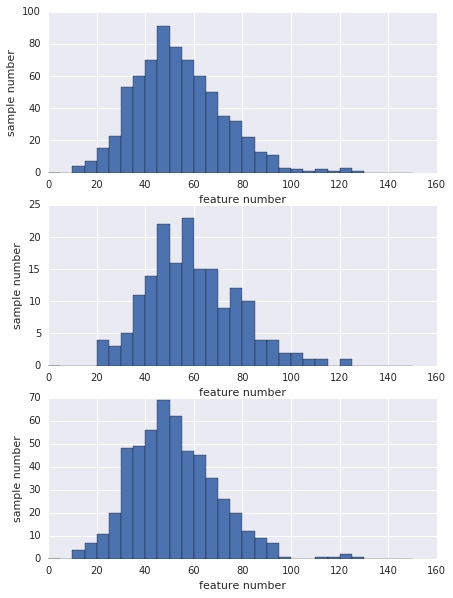

In [6]:
plt.subplots_adjust(left=0.1, bottom=0.1, right=1, top=2, wspace=0.2, hspace=0.2)
plt.subplot(311)
plt.xlabel("feature number")
plt.ylabel("sample number")
plt.hist(all_sample_features, bins=30, range=(0, 150))
plt.subplot(312)
plt.xlabel("feature number")
plt.ylabel("sample number")
plt.hist(pos_sample_features, bins=30, range=(0, 150))
plt.subplot(313)
plt.xlabel("feature number")
plt.ylabel("sample number")
plt.hist(neg_sample_features, bins=30, range=(0, 150))

(array([  6.,   9.,  24.,  55.,  49.,  84.,  96.,  78.,  70.,  71.,  53.,
         26.,  38.,  15.,  13.,   9.,   3.,   1.,   2.,   1.,   3.,   1.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([  12.        ,   17.33333333,   22.66666667,   28.        ,
          33.33333333,   38.66666667,   44.        ,   49.33333333,
          54.66666667,   60.        ,   65.33333333,   70.66666667,
          76.        ,   81.33333333,   86.66666667,   92.        ,
          97.33333333,  102.66666667,  108.        ,  113.33333333,
         118.66666667,  124.        ,  129.33333333,  134.66666667,
         140.        ,  145.33333333,  150.66666667,  156.        ,
         161.33333333,  166.66666667,  172.        ]),
 <a list of 30 Patch objects>)

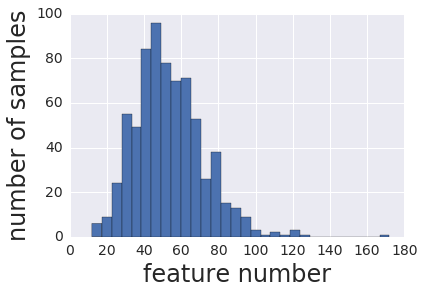

In [7]:

plt.xlabel("feature number", fontsize=24)
plt.ylabel("number of samples", fontsize=24)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.hist(all_sample_features, bins=30)


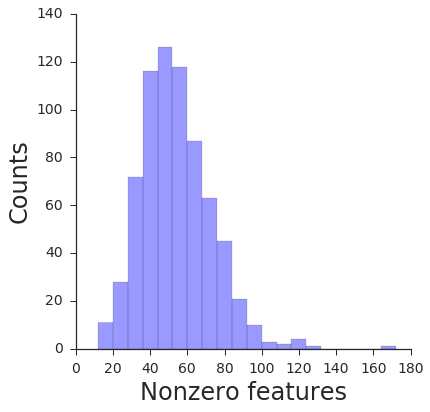

In [8]:
#features_hist = pd.Series(all_sample_features, name="feaures")
sns.set(rc={"figure.figsize": (6, 6)})
sns.set_style("ticks")
sns.set_context("notebook", font_scale=1.4)

#sns.set_palette("bright")


ax = sns.distplot(all_sample_features, bins=20, kde=0, norm_hist=0, hist_kws={"color":"blue"})
ax.set_xlabel("Nonzero features", size=24)
ax.set_ylabel("Counts", size=24)
sns.despine()

In [9]:
#calculate feature distributions
features_in_all = all_sample.sum(axis=0)
features_in_pos = pos.sum(axis=0)
features_in_neg = neg.sum(axis=0)

print("data shape: {}".format(features_in_all.shape))
print("least frequency: {}".format(features_in_all.min()))
print("higest frequency: {}".format(features_in_all.max()))


data shape: (4096,)
least frequency: 0.0
higest frequency: 664.0


(array([ 185.,  385.,  512.,  504.,  460.,  394.,  291.,  242.,  177.,
         145.,  100.,   81.,   68.,   69.,   56.,   47.,   35.,   36.,
          28.,   17.,   21.,    5.,   12.,   11.,   10.,   17.,    5.,
           6.,    8.,   11.,    9.,    5.,    6.,    6.,    4.,    4.,
           6.,    1.,    4.,    2.,    1.,    2.,    4.,    1.,    4.,
           4.,    0.,    3.,    1.,    4.]),
 array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
         11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
         22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,
         33.,  34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,
         44.,  45.,  46.,  47.,  48.,  49.,  50.]),
 <a list of 50 Patch objects>)

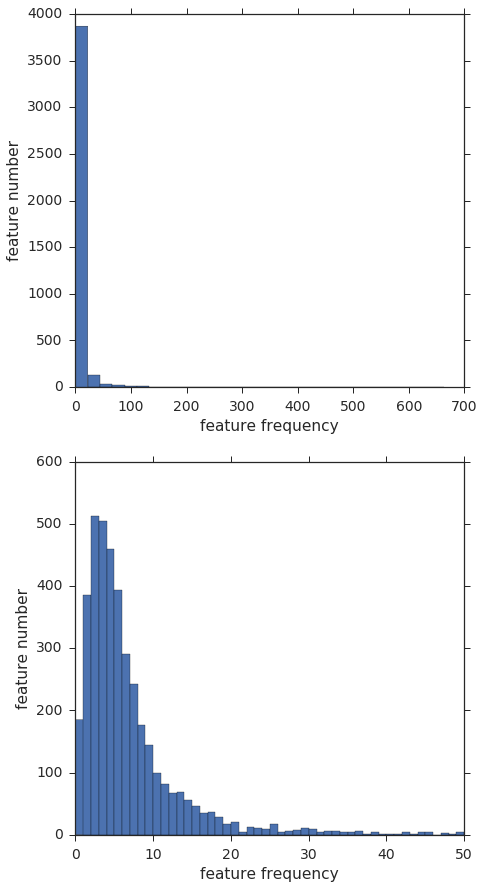

In [10]:
#plot the feature frequency
plt.subplots_adjust(left=0.1, bottom=0.1, right=1, top=2, wspace=0.2, hspace=0.2)
plt.subplot(211)
plt.xlabel("feature frequency")
plt.ylabel("feature number")
plt.hist(features_in_all, bins=30)
plt.subplot(212)
plt.xlabel("feature frequency")
plt.ylabel("feature number")
plt.hist(features_in_all, bins=50, range=(0,50))



(array([ 185.,  385.,  512.,  504.,  460.,  394.,  291.,  242.,  177.,
         145.,  100.,   81.,   68.,   69.,   56.,   47.,   35.,   36.,
          28.,   17.,   21.,    5.,   12.,   11.,   10.,   17.,    5.,
           6.,    8.,   20.]),
 array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
         11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
         22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.]),
 <a list of 30 Patch objects>)

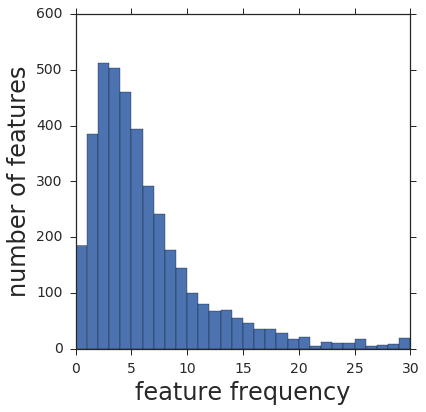

In [11]:
plt.xlabel("feature frequency", fontsize=24)
plt.ylabel("number of features", fontsize=24)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.hist(features_in_all, bins=30, range=(0,30))


In [12]:
#check high frequency features (> 2)
f_index = np.arange(4096)[features_in_all > 1]
f_index = f_index.astype(np.str)
f_index.shape

(3526,)

In [13]:
#subtract data with selected features
new_index = ['hits']
new_index = np.append(new_index, f_index)
new_data = train_data[new_index]
new_data.head()

,hits,0,1,2,3,4,5,7,8,9,...,4084,4085,4086,4087,4088,4089,4090,4091,4092,4093
0,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


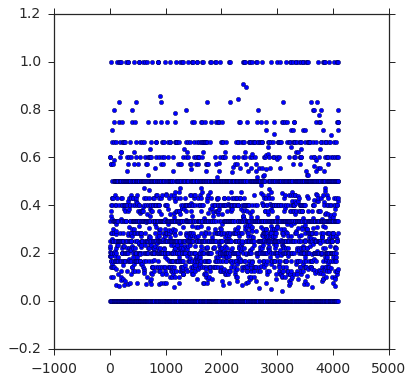

In [14]:
#calculate the distribution of each features
new_pos = new_data[new_data['hits'] == 1].iloc[:, 1:].sum()
new_all = new_data.iloc[:, 1:].sum()
ratio = new_pos / new_all
plt.scatter(f_index, ratio)


In [15]:
#new features have ratio large than certain threshold
#f_index = f_index[ratio > 0.65]
f_index.shape

(3526,)

In [16]:

new_data = train_data[f_index]
new_data.insert(loc=0, column='hits', value=train_data['hits'])
new_data.insert(loc=0, column='names', value=train_data.iloc[:, 0])
new_data.head()


,names,hits,0,1,2,3,4,5,7,8,...,4084,4085,4086,4087,4088,4089,4090,4091,4092,4093
0,Cyclosporin A,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,Lidocaine hydrochloride,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Leflunomide,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Debrisoquin sulfate,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,3-alpha-Hydroxy-5-beta-androstan-17-one,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
# new_data.to_csv("data/new_train.csv", index=False)

In [18]:
# #format test data 
# test_data = pd.read_csv("data/test.csv")
# new_data = test_data[f_index]
# new_data.insert(loc=0, column='hits', value=test_data['hits'])
# new_data.insert(loc=0, column='names', value=test_data.iloc[:, 0])
# # new_data.shape

In [19]:
# new_data.to_csv("data/new_test.csv", index=False)

In [20]:
# # Data to plot
# plt.bar([0, 1], (25, 75))
# plt.xticks([0, 1], ('Anti', 'B'))

